In [123]:
import urllib.request
import json

data = []
for i in range(1,101):
    string_i = str(i)
    url=('https://jsonplaceholder.typicode.com/posts/' + string_i)
    response = urllib.request.urlopen(url)
    data.append(json.loads(response.read().decode('UTF-8')))

file_path = 'data_from_api/data.json'
with open(file_path, 'w', encoding='UTF-8') as file:
    json.dump(data, file)

In [70]:
with open(file_path, 'r', encoding='UTF-8') as openfile:
    json_object = json.load(openfile)
print(json_object) 

[{'userId': 1, 'id': 1, 'title': 'sunt aut facere repellat provident occaecati excepturi optio reprehenderit', 'body': 'quia et suscipit\nsuscipit recusandae consequuntur expedita et cum\nreprehenderit molestiae ut ut quas totam\nnostrum rerum est autem sunt rem eveniet architecto'}, {'userId': 1, 'id': 2, 'title': 'qui est esse', 'body': 'est rerum tempore vitae\nsequi sint nihil reprehenderit dolor beatae ea dolores neque\nfugiat blanditiis voluptate porro vel nihil molestiae ut reiciendis\nqui aperiam non debitis possimus qui neque nisi nulla'}, {'userId': 1, 'id': 3, 'title': 'ea molestias quasi exercitationem repellat qui ipsa sit aut', 'body': 'et iusto sed quo iure\nvoluptatem occaecati omnis eligendi aut ad\nvoluptatem doloribus vel accusantium quis pariatur\nmolestiae porro eius odio et labore et velit aut'}, {'userId': 1, 'id': 4, 'title': 'eum et est occaecati', 'body': 'ullam et saepe reiciendis voluptatem adipisci\nsit amet autem assumenda provident rerum culpa\nquis hic c

In [71]:
import pandas as pd

df = pd.read_json(file_path)
df.head()

,userId,id,title,body
0,1,1,sunt aut facere repellat provident occaecati e...,quia et suscipit\nsuscipit recusandae consequu...
1,1,2,qui est esse,est rerum tempore vitae\nsequi sint nihil repr...
2,1,3,ea molestias quasi exercitationem repellat qui...,et iusto sed quo iure\nvoluptatem occaecati om...
3,1,4,eum et est occaecati,ullam et saepe reiciendis voluptatem adipisci\...
4,1,5,nesciunt quas odio,repudiandae veniam quaerat sunt sed\nalias aut...


In [13]:
import requests
from bs4 import BeautifulSoup

url = 'https://semarangkota.go.id/category/all'
response = requests.get(url)

# Parse the HTML code using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <title>
   Berita |  Pemerintah Kota Semarang
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="Web Portal Pemerintah Kota Semarang" name="description"/>
  <meta content="portal semarang, informasi semarang, semarang smart city, Perijinan Semarang, layanan publik semarang" name="keywords"/>
  <meta content="Pemkot Semarang" name="author"/>
  <!-- browser color -->
  <meta content="#bf0426" name="theme-color"/>
  <meta content="#bf0426" name="msapplication-navbutton-color"/>
  <meta content="yes" name="apple-mobile-web-app-capable"/>
  <meta content="black-translucent" name="apple-mobile-web-app-status-bar-style"/>
  <link href="https://semarangkota.go.id/assets/img/favicon.png" rel="icon" type="image/x-icon"/>
  <link href="https://semarangkota.go.id/assets/img/favicon

In [21]:
import pandas as pd

# Extract the relevant information from the HTML code

titles = []
divTitles = soup.findAll(class_='post-pad')    
# print(divTitles)
for divTitle in divTitles:
     title = divTitle.find('h3').find('a').get_text()
     titles.append(title)

# Store the information in a pandas dataframe
df = pd.DataFrame(titles, columns=['Title'])

df.head()

,Title
0,"Sukses Percepat Digitalisasi, Pemkot Semarang ..."
1,"Skkapi Aksi Kenakalan Remaja, Mbak Ita Tekanka..."
2,"Hebat, Mbak Ita Berhasil Raih Dua Penghargaan ..."
3,"Keren, Kelurahan Pudakpayung Semarang Masuk Ti..."
4,Pemkot Semarang Terus Upayakan Usaha Lokal Bis...


In [125]:
# Export the data to a CSV file
csv_path = 'data_from_scraping/kdnuggets_latest_posts'
df.to_csv(csv_path, index=False)

In [128]:
df_kdnuggets_latest_posts = pd.read_csv(csv_path)

df.head()

,Title,Description,Author
0,10 Free Resources to Learn LLMs,Learn large language models with these free re...,Natassha Selvaraj
1,How To Use Docker Volumes for Persistent Data ...,Learn how to use Docker volumes to ensure data...,Bala Priya C
2,Top 5 Free Machine Learning Courses to Level U...,The article highlights five top free machine l...,Josep Ferrer
3,Pip Install YOU: A Beginner’s Guide to Creatin...,Have you ever wanted to create your library in...,Kanwal Mehreen
4,How to Apply Padding to Arrays with NumPy,"In this article, you will learn how to apply p...",Shittu Olumide


In [1]:
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
import numpy as np

# Synthetic feature matrix X with missing values
X = np.array([[2.5, 1.0, np.nan],
              [5.0, np.nan, 4.0],
              [3.0, 1.5, 3.5],
              [1.0, 0.5, 2.0],
              [4.5, 1.8, np.nan],
              [2.8, 1.2, 3.2]])

y = [10, 20, 15, 5, 18, 12]

# Initialize SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Fit and transform the input features
X_imputed = imputer.fit_transform(X)

# Initialize and train XGBoost model
model = XGBRegressor(random_state=42)
model.fit(X_imputed, y)

# New data for prediction with missing values
X_new = np.array([[3.2, np.nan, 3.4],
                  [1.5, 0.8, np.nan]])

# Impute missing values in new data
X_new_imputed = imputer.transform(X_new)

# Make predictions
predictions = model.predict(X_new_imputed)

print("Predictions:", predictions)

Predictions: [15.000094  5.001064]


In [19]:
import pandas as pd

path ="../datasets/Iris.csv"
dataset = pd.read_csv(path)

In [9]:
# Dimensions of the dataset
print(f'shape: \n{dataset.shape}\n')

# Peek at the data itself
print(f'head: \n{dataset.head(10)}\n')

# Checking last 10 rows using tail. By default tail shows last 5 rows.
print(f'tail: \n{dataset.tail(10)}\n')

# Check the columns
print(f'columsn: \n{dataset.columns}')


shape: 
(150, 6)

head: 
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
5   6            5.4           3.9            1.7           0.4  Iris-setosa
6   7            4.6           3.4            1.4           0.3  Iris-setosa
7   8            5.0           3.4            1.5           0.2  Iris-setosa
8   9            4.4           2.9            1.4           0.2  Iris-setosa
9  10            4.9           3.1            1.5           0.1  Iris-setosa

tail: 
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
140  141            6.7           3.1            5

In [10]:
# Basic statistics on data
print(f'describe: \n{dataset.describe}')

describe: 
<bound method NDFrame.describe of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4   

In [14]:
# Covariance on data
dataset.cov(numeric_only=True)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1887.500000,25.782886,-7.492282,67.667785,29.832215
SepalLengthCm,25.782886,0.685694,-0.039268,1.273682,0.516904
SepalWidthCm,-7.492282,-0.039268,0.188004,-0.321713,-0.117981
PetalLengthCm,67.667785,1.273682,-0.321713,3.113179,1.296387
PetalWidthCm,29.832215,0.516904,-0.117981,1.296387,0.582414


In [16]:
# Correlation matrix on data
dataset.corr(numeric_only=True)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [20]:
#Remove unwanted column(s) from the data
print(f'column (before): \n{dataset.columns}\n')
dataset = dataset.drop('Id',axis=1)
print(f'column (after): \n{dataset.columns}')


column (before): 
Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

column (after): 
Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [21]:
# Check total null on data
dataset.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [22]:
# Checking column data types using dtypes
dataset.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [24]:
# Breakdown of the data by the class variable
print(f'with size of a goupby: \n{dataset.groupby('Species').size()}\n')
# Or
print(f'with value_count: \n{dataset.Species.value_counts()}')


with size of a goupby: 
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

with value_count: 
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


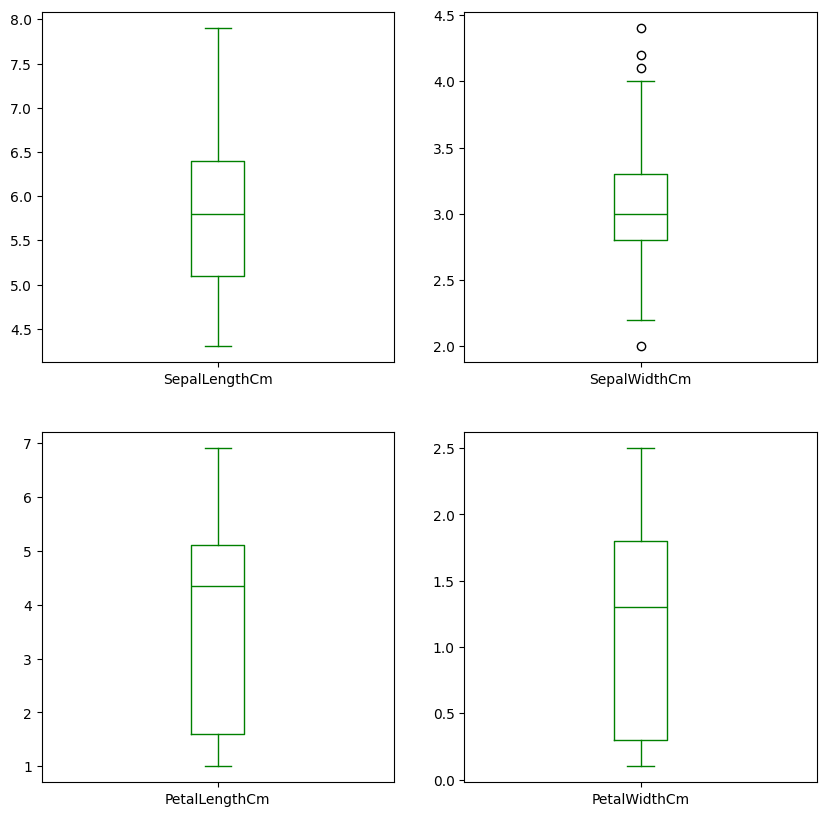

In [27]:
import matplotlib.pyplot as plt 

# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False,color="green", figsize=(10,10))
plt.show()

<Axes: >

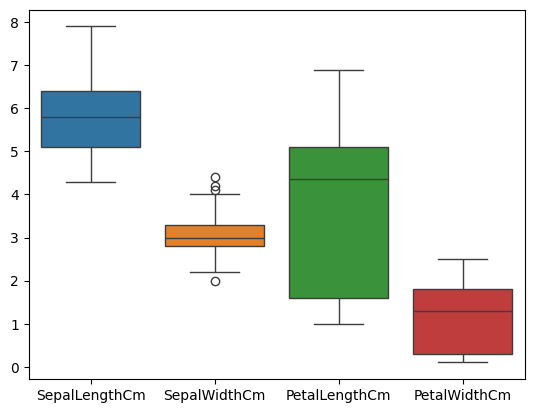

In [28]:
import seaborn as sns 

sns.boxplot(data=dataset)

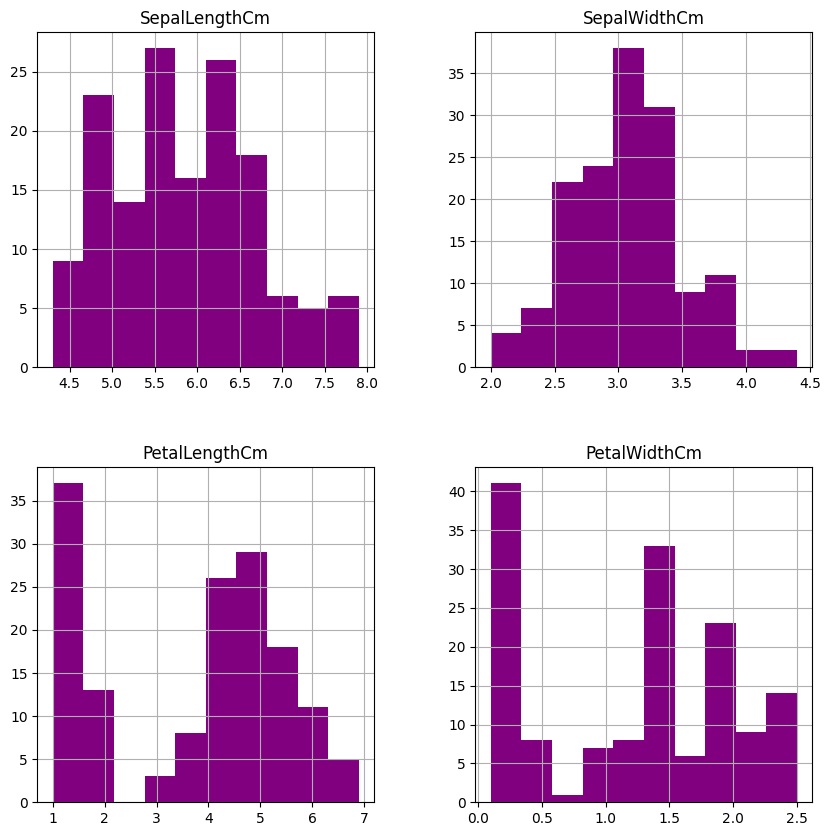

In [29]:
# histograms
dataset.hist(color="purple",figsize=(10,10))
plt.show()

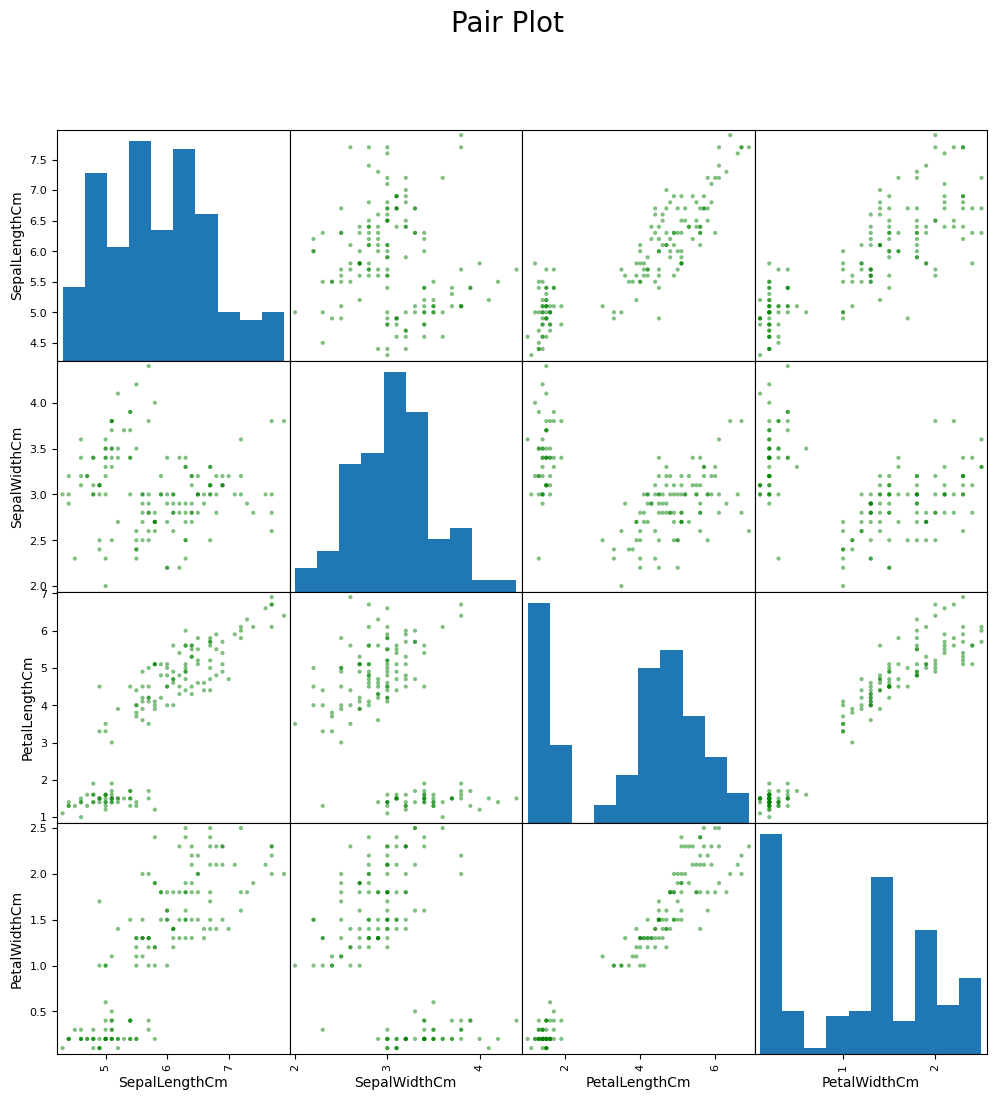

In [35]:
from pandas.plotting import scatter_matrix

# Scatter plot matrix
scatter_matrix(dataset,color="green",figsize =(12,12))
# Use suptitle to add title to all sublots
plt.suptitle("Pair Plot", fontsize=20)
plt.show()

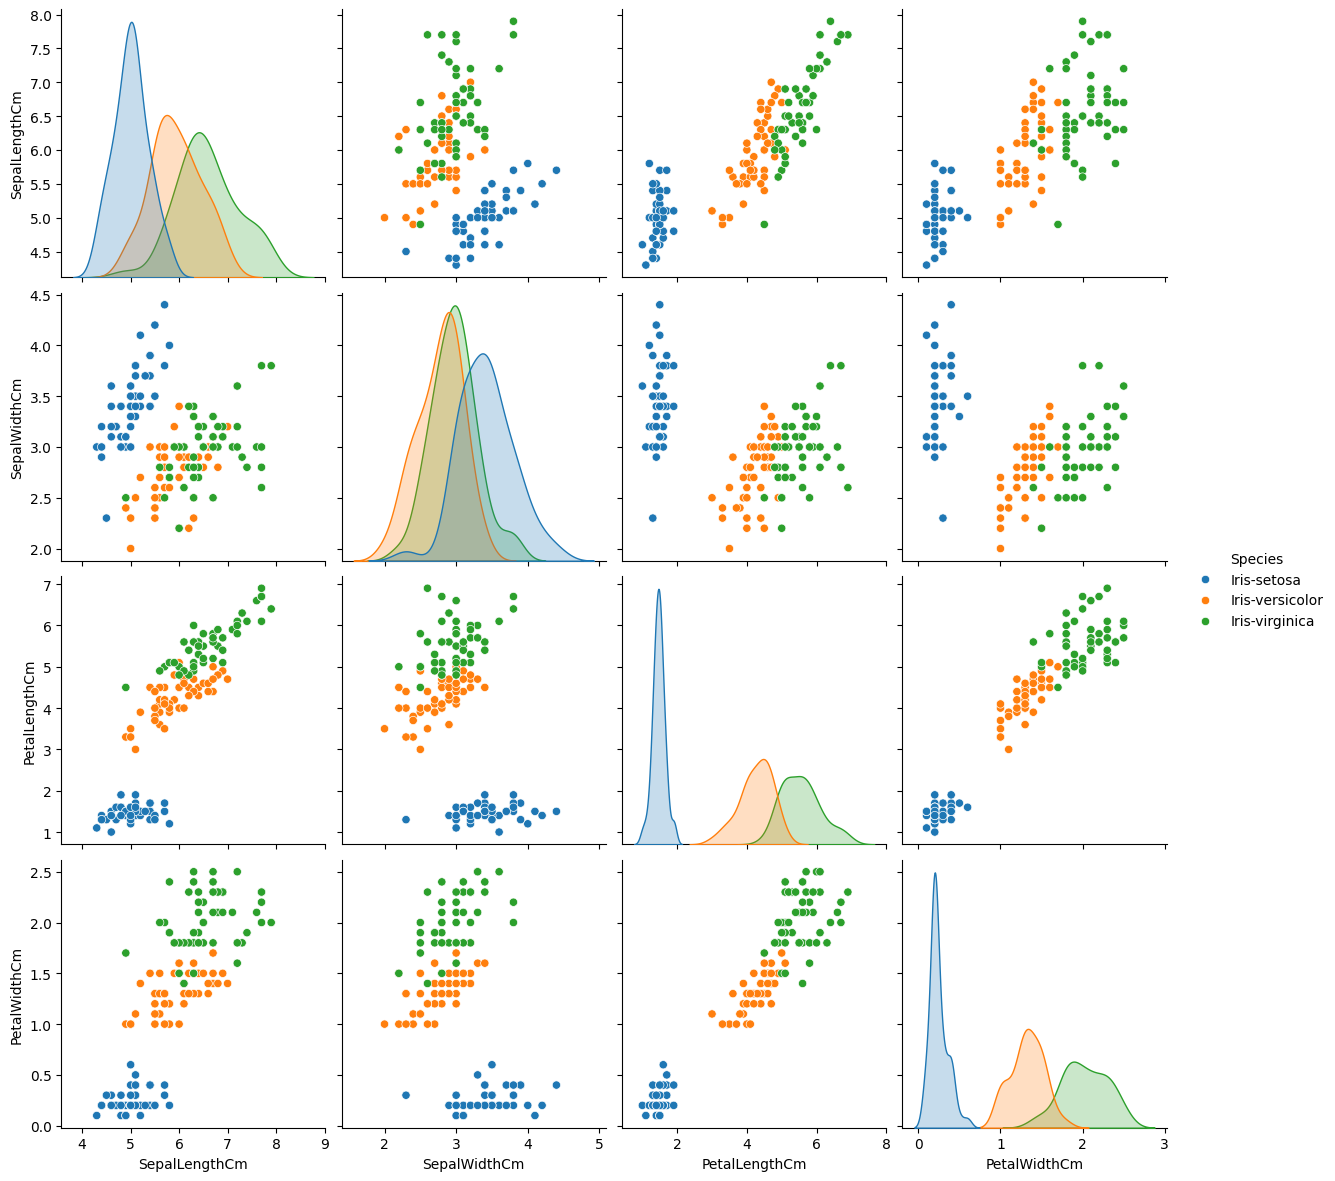

In [36]:
# Using seaboarns package we can show rich plots
sns.pairplot(dataset, hue="Species", height=3, diag_kind="kde")
plt.show()

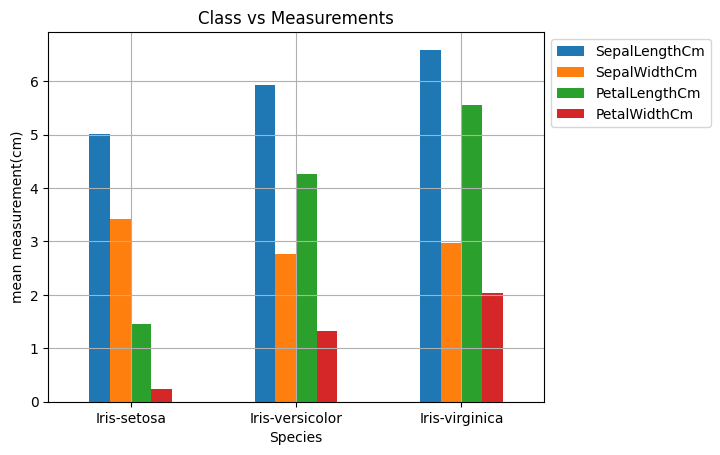

In [37]:
# print the mean for each column by species
dataset.groupby(by = "Species").mean()
# plot for mean of each feature for each label class
dataset.groupby(by = "Species").mean().plot(kind="bar")
plt.title('Class vs Measurements')
plt.ylabel('mean measurement(cm)')
plt.xticks(rotation=0)  # manage the xticks rotation
plt.grid(True)
# Use bbox_to_anchor option to place the legend outside plot area to be tidy
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000


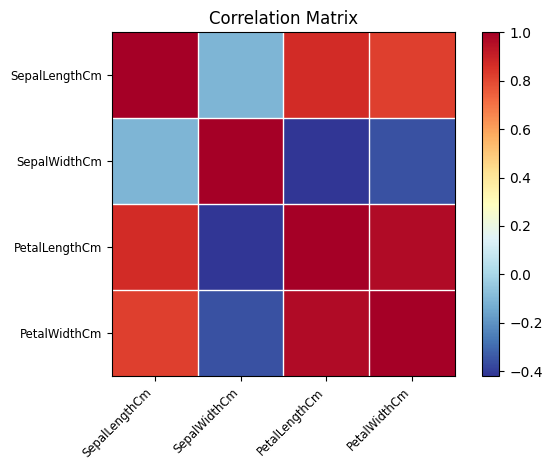

In [40]:
import statsmodels.api as sm

# create correlation matrix
corr = dataset.corr(numeric_only=True)
print(corr)

sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

In [41]:
# Convert target variable (Species) as category
dataset.Species = dataset.Species.astype('category')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   SepalLengthCm  150 non-null    float64 
 1   SepalWidthCm   150 non-null    float64 
 2   PetalLengthCm  150 non-null    float64 
 3   PetalWidthCm   150 non-null    float64 
 4   Species        150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [42]:
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [44]:
# Access converted values using codes property
dataset.Species.cat.codes.unique()

array([0, 1, 2], dtype=int8)

In [45]:
dataset.Species.unique()

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
Categories (3, object): ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [49]:
# Perform one-hot encoding on the species column of the Iris dataset
one_hot_dataset = pd.get_dummies(dataset, columns=['Species'])

one_hot_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SepalLengthCm            150 non-null    float64
 1   SepalWidthCm             150 non-null    float64
 2   PetalLengthCm            150 non-null    float64
 3   PetalWidthCm             150 non-null    float64
 4   Species_Iris-setosa      150 non-null    bool   
 5   Species_Iris-versicolor  150 non-null    bool   
 6   Species_Iris-virginica   150 non-null    bool   
dtypes: bool(3), float64(4)
memory usage: 5.3 KB


In [53]:
#Standardise the length and width columns of the iris dataset

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dataset[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']] = scaler.fit_transform(dataset[
    ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])

In [55]:
dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,-0.900681,1.032057,-1.341272,-1.312977,Iris-setosa
1,-1.143017,-0.124958,-1.341272,-1.312977,Iris-setosa
2,-1.385353,0.337848,-1.398138,-1.312977,Iris-setosa
3,-1.506521,0.106445,-1.284407,-1.312977,Iris-setosa
4,-1.021849,1.263460,-1.341272,-1.312977,Iris-setosa
...,...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956,Iris-virginica
146,0.553333,-1.281972,0.705893,0.922064,Iris-virginica
147,0.795669,-0.124958,0.819624,1.053537,Iris-virginica
148,0.432165,0.800654,0.933356,1.447956,Iris-virginica


In [56]:
# Create two new columns: sepal_ratio and petal_ratio
dataset['SepalRatio'] = dataset['SepalLengthCm'] / dataset['SepalWidthCm']
dataset['PetalRatio'] = dataset['PetalLengthCm'] / dataset['PetalWidthCm']
dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SepalRatio,PetalRatio
0,-0.900681,1.032057,-1.341272,-1.312977,Iris-setosa,-0.872705,1.021551
1,-1.143017,-0.124958,-1.341272,-1.312977,Iris-setosa,9.147238,1.021551
2,-1.385353,0.337848,-1.398138,-1.312977,Iris-setosa,-4.100517,1.064861
3,-1.506521,0.106445,-1.284407,-1.312977,Iris-setosa,-14.152993,0.978240
4,-1.021849,1.263460,-1.341272,-1.312977,Iris-setosa,-0.808770,1.021551
...,...,...,...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956,Iris-virginica,-8.306856,0.566056
146,0.553333,-1.281972,0.705893,0.922064,Iris-virginica,-0.431627,0.765558
147,0.795669,-0.124958,0.819624,1.053537,Iris-virginica,-6.367512,0.777974
148,0.432165,0.800654,0.933356,1.447956,Iris-virginica,0.539765,0.644602
